We are going to predict credit card balance using regression techniques. We analyse data of 400 card holders on the basis of 11 variables and predict their credit card balance. This can be used to analyse what customers are at a risk of being credit card defaulters and what the consumer behaviour of potential customers will look like. We use multivariable regression. This determines the degree to which dependent and independent variables are related to eachother linearly.

Aim : To see what all factors influence the credit card balance of credit card holders and predict the average balance 
of an individual.
Factors affecting:
ID,
Income,
Limit,
Rating - Measurement of a person or a business to repay any financial obligation based on past repaymentand credit balance,
Age - Age in years,
Education - number of years of education,
Gender - Male or Female,
Student - Yes or No,
Married - Yes or No,
Ethnicity - African American, Asian or Caucasian,
Balance - Average credit card balance in $




Credit card balance is the amount that you owe on the credit card. Balance increases when purchases are made and decreases
when payments are made. Credit card Balance refers to the average monthly balance across all of the cards owned by a cardholder. This assumption was made as a result of the Cards variable which refers to the number of credit cards owned by a person and has only one associated Balance figure.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
%matplotlib inline


In [3]:
df = pd.read_csv('Credit.csv', index_col=0)

In [4]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Categorical variables include gender, student, married, ethnicity. We have to convert them to appropriate data type.
These look like strings but they are represented by an array of integers. astype converts pandas data to a particular data type.

In [5]:
df.Gender = df.Gender.astype('category')
df.Student = df.Student.astype('category')
df.Married = df.Married.astype('category')
df.Ethnicity = df.Ethnicity.astype('category')

## EXPLORATORY DATA ANALYSIS

In [6]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [7]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [8]:
 df.describe(include=['category']) #only checking for categorical variables

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


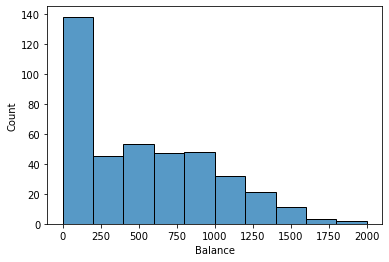

In [9]:
sns.histplot(df.Balance)

We see that a large no. of credit cards have zero balance. If the average credit card balance is zero we can 
conclude that these cards are not in use. As a credit card company we may be interested in knowing the credit balance 
of our frequent users. So these zero balance credit cards may skew our results. So we make a copy of the balances which are > 0.

In [10]:
active_balance = df.loc[df['Balance']>0].copy()
active_balance.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [11]:
active_balance.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,49.978810,5485.467742,405.051613,2.996774,55.606452,13.425806,670.987097
std,37.881628,2052.451743,137.967389,1.426740,17.341794,3.208904,413.904019
min,10.354000,1160.000000,126.000000,1.000000,23.000000,5.000000,5.000000
25%,23.150250,3976.250000,304.000000,2.000000,42.000000,11.000000,338.000000
50%,37.141000,5147.000000,380.000000,3.000000,55.500000,14.000000,637.500000
75%,63.740250,6453.250000,469.000000,4.000000,69.000000,16.000000,960.750000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


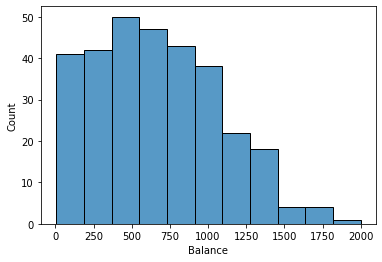

In [12]:
sns.histplot(active_balance.Balance)

If we exclude the zero balances, we see that the plot represents a normal distribution. We will be using 
both the dataframes to fit models and compare results. We also will add a column depicting whether a user is 
an active credit card user or not (decided by whether their average credit card balance is > 0)

In [13]:
df['Active'] = np.where(df['Balance'] > 0 , 'Yes' , 'No')

In [14]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Active
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,Yes
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,Yes
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,Yes
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,Yes
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,Yes


In [15]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Active
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,Yes
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,Yes
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,Yes
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,Yes
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,Yes
397,13.364,3838,296,5,65,17,Male,No,No,African American,480,Yes
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,Yes
399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,No


In [16]:
'''correlation matrix is used to determine the corrrelation between various independent variables of the
dataframe. It is a very powerful tool'''
numeric_df = df.select_dtypes(include=['int64','float64']) #contains only the columns having numerical value not categorical values

In [17]:
numeric_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
1,14.891,3606,283,2,34,11,333
2,106.025,6645,483,3,82,15,903
3,104.593,7075,514,4,71,11,580
4,148.924,9504,681,3,36,11,964
5,55.882,4897,357,2,68,16,331


([<matplotlib.axis.YTick at 0x20fc02c08e0>,
 [Text(0, 0, 'Income'),
  Text(0, 0, 'Limit'),
  Text(0, 0, 'Rating'),
  Text(0, 0, 'Cards'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'Education'),
  Text(0, 0, 'Balance')])

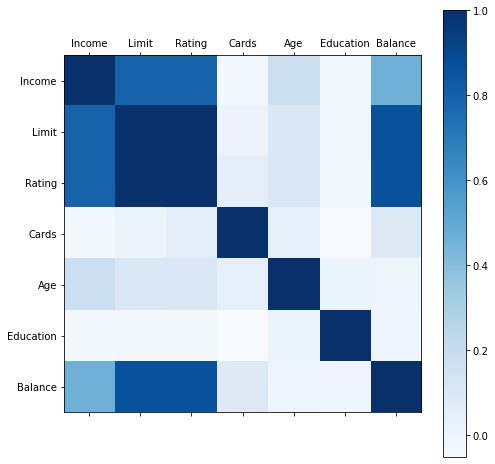

In [18]:
plt.figure(figsize=(8,8))
plt.matshow(df.corr(), cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
tick_marks = [i for i in range(len(numeric_df.columns))] #done to get the tickers for the columns and row
plt.xticks(tick_marks, numeric_df.columns)
plt.yticks(tick_marks, numeric_df.columns)

The above correlation matrix shows that  Balance depends quite a lot on Limit and Rating and depends moderately on Income.
We can also see that Limit and Rating rely heavily on eachother. They also influence the income. However only this
investigation isn not sufficient.

In [19]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df.Balance, df.Limit)
msg = "Correlation coefficient Balance-Limit: {}\n p-value: {}\n"
print(msg.format(r1, p1))
r2, p2 = pearsonr(df.Balance, df.Rating)
msg = "Correlation coefficient Balance-Rating: {}\n p-value: {}\n"
print(msg.format(r2, p2))
r3, p3 = pearsonr(df.Balance, df.Income)
msg = "Correlation coefficient Balance-Income: {}\n p-value: {}\n"
print(msg.format(r3, p3))
r4, p4 = pearsonr(df.Limit, df.Rating)
msg = "Correlation coefficient Limit-Rating: {}\n p-value: {}\n"
print(msg.format(r4, p4))
r5, p5 = pearsonr(df.Limit, df.Income)
msg = "Correlation coefficient Limit-Income: {}\n p-value: {}\n"
print(msg.format(r5, p5))
r6, p6 = pearsonr(df.Rating, df.Income)
msg = "Correlation coefficient Rating-Income: {}\n p-value: {}\n"
print(msg.format(r6, p6))

Correlation coefficient Balance-Limit: 0.8616972670153953
 p-value: 2.5305807117131246e-119

Correlation coefficient Balance-Rating: 0.8636251606214954
 p-value: 1.8988990970389376e-120

Correlation coefficient Balance-Income: 0.4636564570157575
 p-value: 1.0308858025890125e-22

Correlation coefficient Limit-Rating: 0.9968797370016826
 p-value: 0.0

Correlation coefficient Limit-Income: 0.7920883413369415
 p-value: 2.3917894422844805e-87

Correlation coefficient Rating-Income: 0.7913776251121218
 p-value: 4.362691443088444e-87



Correlation coeff of 0 means no correlation, -1 means opposite correlation and 1 means similar linear correlation. We see that the correlation coefficients are quite significant. Also Limit-Rating has a very significant correlation.

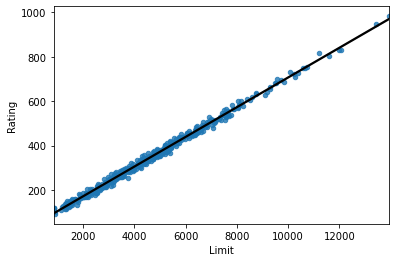

In [20]:
sns.regplot(x='Limit', y='Rating', data=df, scatter_kws = {'s': 20},line_kws = {'color':'black'})

Gender
 Male     AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

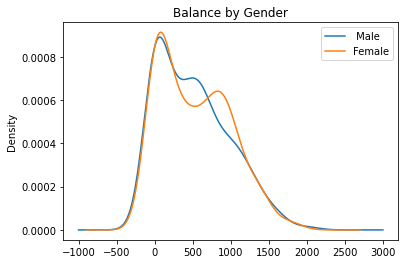

In [21]:
'''Examining the categorical variables and their relationship with Balance'''
df.groupby('Gender').Balance.plot(kind='kde', legend=True, title='Balance by Gender')


Student
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

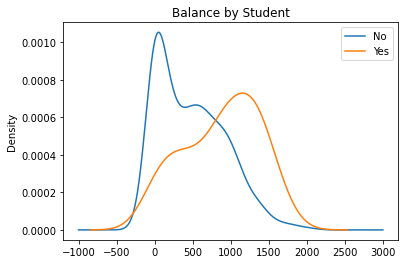

In [22]:
df.groupby('Student').Balance.plot(kind='kde', legend=True, title='Balance by Student')

Married
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

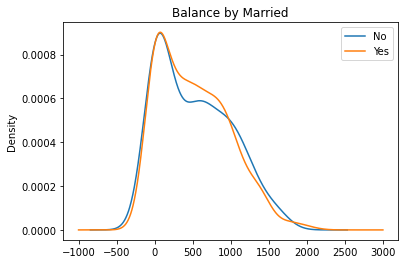

In [23]:
df.groupby('Married').Balance.plot(kind='kde', legend=True, title='Balance by Married')


Ethnicity
African American    AxesSubplot(0.125,0.125;0.775x0.755)
Asian               AxesSubplot(0.125,0.125;0.775x0.755)
Caucasian           AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

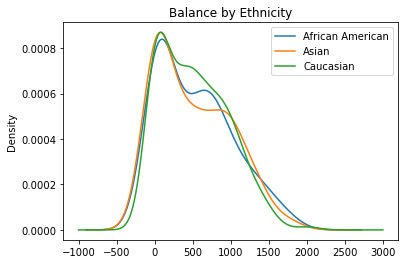

In [24]:
df.groupby('Ethnicity').Balance.plot(kind='kde',legend=True, title='Balance by Ethnicity')

We see only the categorical variable student affects the Balance distribution. Now we can verify the same only on the active data.

Gender
 Male     AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

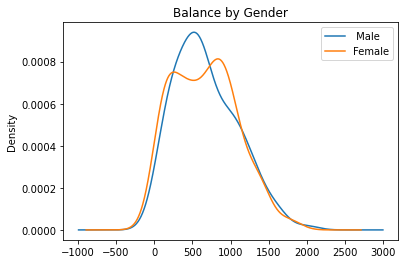

In [25]:
active_balance.groupby('Gender').Balance.plot(kind='kde',legend=True, title='Balance by Gender')

Student
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

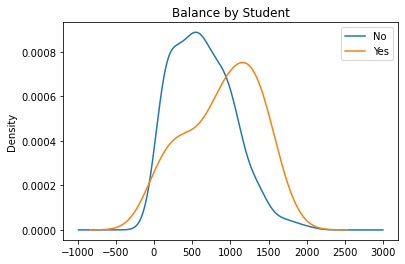

In [26]:
active_balance.groupby('Student').Balance.plot(kind='kde', legend=True, title='Balance by Student')

Married
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

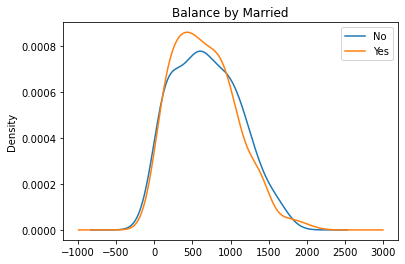

In [27]:
active_balance.groupby('Married').Balance.plot(kind='kde', legend=True, title='Balance by Married')

Ethnicity
African American    AxesSubplot(0.125,0.125;0.775x0.755)
Asian               AxesSubplot(0.125,0.125;0.775x0.755)
Caucasian           AxesSubplot(0.125,0.125;0.775x0.755)
Name: Balance, dtype: object

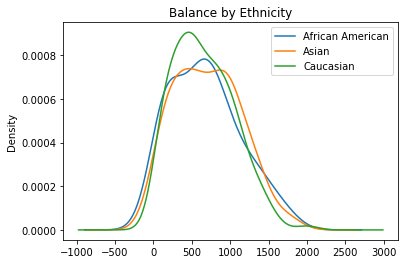

In [28]:
active_balance.groupby('Ethnicity').Balance.plot(kind='kde', legend=True, title='Balance by Ethnicity')

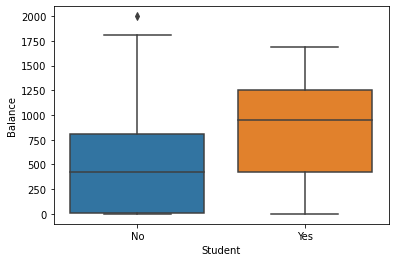

In [29]:
'''Examining the student variable further.'''
sns.boxplot(x='Student', y='Balance', data = df)

We see that generally students have a highe rcredit card Balance. This can be because students have to pay loans. 
They also have low personal income. They also have less control over their finances and hence end up spending more.

## Multivariable Regression Modelling

We have earlier seen that Limit and Rating are highly correlated. Rating makes more sense to be used to predit Balance.
So we drop limit and create a Linear Regression model using ordinary least square method.

In [30]:
model = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     757.8
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          4.46e-248
Time:                        00:14:17   Log-Likelihood:                -2415.4
No. Observations:                 400   AIC:                             4853.
Df Residuals:                     389   BIC:                             4897.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -549.3140     35.085    -15.657      0.000    -618.293    -480.335
Gender[T.Female]         -10.7106     10.325     -1.037      0.300     -31.010       9.589
Student[T.Yes]           416.4376     17.336     24.021      0.000     382.353     450.522
Married[T.Yes]           -15.1096     10.728     -1.408      0.160     -36.202       5.983
Ethnicity[T.Asian]        21.7616     14.678      1.483      0.139      -7.096      50.619
Ethnicity[T.Caucasian]    10.6492     12.716      0.837      0.403     -14.351      35.649
Income                    -7.7746      0.244    -31.878      0.000      -8.254      -7.295
Rating                     3.9790      0.055     72.332      0.000       3.871       4.087
Cards                      3.9654      3.793      1.045      0.296      -3.492      11.422
Age                       -0.6416      0.306     -2.096      0.037      -1.243      -0.040
Education                 -0.3799      1.659     -0.229      0.819      -3.642       2.882
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.769
Skew:                           0.490   Prob(JB):                     0.000228
Kurtosis:                       2.789   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Income has a negative impact that is if income is high, generally the need to access loans will be less. With age, credit
balance decreases as people become more responsible of their expenses. Factors lie Ethnicity, Cards, Age, Marriage do not have a significant impact .

In [31]:
model_active = smf.ols('Balance ~ Income + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', data = active_balance).fit()
model_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          1.38e-264
Time:                        00:14:17   Log-Likelihood:                -1659.9
No. Observations:                 310   AIC:                             3342.
Df Residuals:                     299   BIC:                             3383.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -791.3689     21.193    -37.340      0.000    -833.076    -749.662
Gender[T.Female]          -2.6107      5.961     -0.438      0.662     -14.341       9.119
Student[T.Yes]           478.1566      9.239     51.752      0.000     459.974     496.339
Married[T.Yes]           -14.0808      6.221     -2.263      0.024     -26.324      -1.837
Ethnicity[T.Asian]         4.1786      8.590      0.486      0.627     -12.726      21.083
Ethnicity[T.Caucasian]    -1.8990      7.284     -0.261      0.794     -16.233      12.435
Income                    -9.7126      0.145    -66.859      0.000      -9.999      -9.427
Rating                     4.7767      0.040    120.602      0.000       4.699       4.855
Cards                      3.0923      2.102      1.471      0.142      -1.045       7.229
Age                       -1.1431      0.176     -6.481      0.000      -1.490      -0.796
Education                  1.2817      0.938      1.366      0.173      -0.564       3.128
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.433
Skew:                          -0.139   Prob(JB):                        0.296
Kurtosis:                       2.666   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
'''Now we fit the model with only parameters that proved to be significant.'''
model_1=smf.ols('Balance ~ Income + Rating + Student + Age',data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1892.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          4.17e-256
Time:                        00:14:18   Log-Likelihood:                -2418.6
No. Observations:                 400   AIC:                             4847.
Df Residuals:                     395   BIC:                             4867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -547.3047     21.461    -25.503      0.000    -589.496    -505.113
Student[T.Yes]   417.5056     17.172     24.314      0.000     383.746     451.265
Income            -7.7977      0.242    -32.198      0.000      -8.274      -7.322
Rating             3.9807      0.055     72.927      0.000       3.873       4.088
Age               -0.6242      0.304     -2.053      0.041      -1.222      -0.026
==============================================================================
Omnibus:                       15.838   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.000
Skew:                           0.494   Prob(JB):                     0.000203
Kurtosis:                       2.793   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Student
No     AxesSubplot(0.59,0.125;0.31x0.18875)
Yes    AxesSubplot(0.59,0.125;0.31x0.18875)
Name: Age, dtype: object

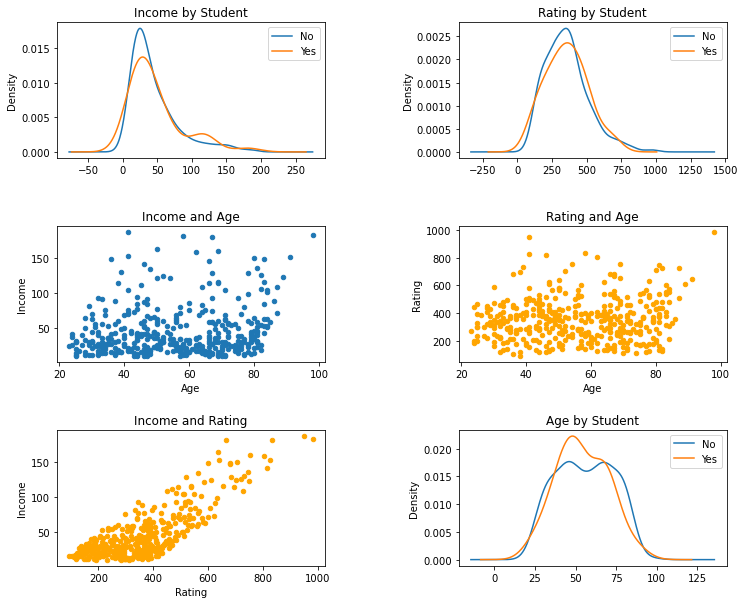

In [33]:
#The R-squared value has decreased. So we check the relationships between the above four variables.
f, axes = plt.subplots(3, 2, figsize=(12, 10))
f.subplots_adjust(hspace=.5, wspace=.5)
df.groupby('Student').Income.plot(kind='kde', ax=axes[0][0], legend=True, title='Income by Student')
df.groupby('Student').Rating.plot(kind='kde', ax=axes[0][1],legend=True, title='Rating by Student')
df.plot(kind='scatter', x='Age' , y='Income' , ax=axes[1][0], title='Income and Age')
df.plot(kind='scatter', x='Age' , y='Rating' , ax=axes[1][1], color='orange', title='Rating and Age')
df.plot(kind='scatter', x='Rating' , y='Income' , ax=axes[2][0], color='orange', title='Income and Rating')
df.groupby('Student').Age.plot(kind='kde', ax=axes[2][1], legend=True, title='Age by Student')

Positive relationship between Income and Rating, Students display lower values of Income compared to non-Students, The Income does not Increase with Age, and the Age of Students compared to non-Students does not differ significantly, Now we examine balance and income for students and non-students. We only take into account non-zero balances.

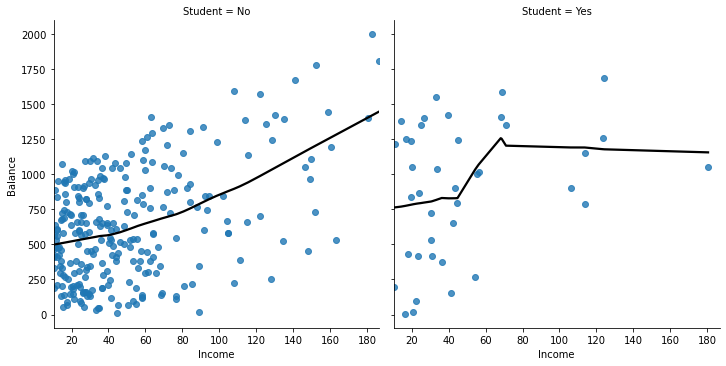

In [34]:
sns.lmplot(x='Income',y='Balance',data=active_balance,line_kws={'color':'black'},lowess=True,col='Student')

We can see a positive relation between income and balance however earlier we had seen a negative relationship for non students. Now we check whether the relationship is non-linear.

## Non-linear relationships

In [35]:
mod_non_linear = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Rating', data = df).fit()
mod_non_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     1524.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          3.68e-255
Time:                        00:14:20   Log-Likelihood:                -2416.9
No. Observations:                 400   AIC:                             4846.
Df Residuals:                     394   BIC:                             4870.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -527.6722     23.950    -22.032      0.000    -574.757    -480.587
Student[T.Yes]   416.9706     17.124     24.350      0.000     383.305     450.636
Income            -8.6268      0.514    -16.768      0.000      -9.638      -7.615
I(Income ** 2)     0.0055      0.003      1.825      0.069      -0.000       0.011
Age               -0.6161      0.303     -2.032      0.043      -1.212      -0.020
Rating             3.9790      0.054     73.098      0.000       3.872       4.086
==============================================================================
Omnibus:                       14.185   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.920
Skew:                           0.456   Prob(JB):                     0.000576
Kurtosis:                       2.748   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has improved and the non-linear term is marginally significant. Additionally, while Income has a negative impact on Balance, Income squared has a slightly positive impact. We expect Balance to have a negative slope initially, and a positive one at higher levels of Income. We can plot this relationship.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


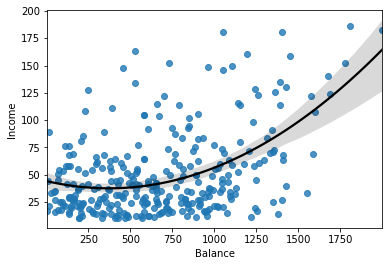

In [36]:
sns.regplot('Balance', 'Income',
           data = active_balance,
            order=2,
           line_kws={'color':'black'})

As anticipated, at lower levels of Income, increases in personal Income cause a decrease in credit card Balance, which can be interpreted as individuals requiring less financing as they make use of personal finances instead of credit debt.

However, at high levels of income, Balance increases, meaning that those individuals are in higher need of loans, potentially due to increased investment activities and a greater risk tolerance.

## Interaction between various predictors


In [37]:
mod_income_rating = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Income*Rating', data = df).fit()
mod_income_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1458.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          5.13e-265
Time:                        00:14:21   Log-Likelihood:                -2390.0
No. Observations:                 400   AIC:                             4794.
Df Residuals:                     393   BIC:                             4822.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -429.1239     25.969    -16.524      0.000    -480.180    -378.068
Student[T.Yes]   425.7135     16.073     26.487      0.000     394.114     457.313
Income            -9.0837      0.485    -18.712      0.000     -10.038      -8.129
I(Income ** 2)    -0.0329      0.006     -5.638      0.000      -0.044      -0.021
Age               -0.6821      0.284     -2.402      0.017      -1.240      -0.124
Rating             3.4940      0.082     42.515      0.000       3.332       3.656
Income:Rating      0.0110      0.001      7.521      0.000       0.008       0.014
==============================================================================
Omnibus:                        7.324   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.374
Skew:                           0.237   Prob(JB):                       0.0413
Kurtosis:                       2.604   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let us check how the parameters that were originally removed interact with those that are present now. 
Let us check this for years spent in Education and personal Income.


In [38]:
model_education_income = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Education*Income', data=df).fit()
model_education_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1096.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          5.89e-253
Time:                        00:14:21   Log-Likelihood:                -2414.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     392   BIC:                             4877.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -455.5497     44.548    -10.226      0.000    -543.133    -367.966
Student[T.Yes]     416.8402     17.116     24.354      0.000     383.189     450.491
Income              -9.9373      0.807    -12.308      0.000     -11.525      -8.350
I(Income ** 2)       0.0060      0.003      1.977      0.049    3.17e-05       0.012
Rating               3.9711      0.054     73.019      0.000       3.864       4.078
Age                 -0.6240      0.302     -2.064      0.040      -1.218      -0.030
Education           -5.0695      2.673     -1.897      0.059     -10.324       0.185
Education:Income     0.0943      0.045      2.091      0.037       0.006       0.183
==============================================================================
Omnibus:                       13.655   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.400
Skew:                           0.450   Prob(JB):                     0.000747
Kurtosis:                       2.771   Cond. No.                     5.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Earlier we thought that education wasn't significant but we can see that it interacts with Income significantly. Let su check between marriage and age also.

In [39]:
model_marriage_age = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Married*Age -1', data=df).fit()
model_marriage_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1101.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          2.35e-253
Time:                        00:14:21   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4843.
Df Residuals:                     392   BIC:                             4875.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Student[No]         -561.6504     32.973    -17.033      0.000    -626.477    -496.823
Student[Yes]        -144.2699     34.942     -4.129      0.000    -212.966     -75.573
Married[T.Yes]        58.2726     35.992      1.619      0.106     -12.489     129.035
Income                -8.6631      0.512    -16.924      0.000      -9.670      -7.657
I(Income ** 2)         0.0059      0.003      1.949      0.052   -5.12e-05       0.012
Rating                 3.9786      0.054     73.496      0.000       3.872       4.085
Age                    0.1420      0.481      0.295      0.768      -0.804       1.088
Married[T.Yes]:Age    -1.2944      0.611     -2.118      0.035      -2.496      -0.093
==============================================================================
Omnibus:                       12.889   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.569
Skew:                           0.438   Prob(JB):                      0.00113
Kurtosis:                       2.786   Cond. No.                     6.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While neither Married nor Age by themselves are significant, the interaction term is. This reveals the fact that individuals with higher values for Age who are also Married have lower credit card Balances pointing to higher financial prudence or risk aversion. We can visualize this relationship.

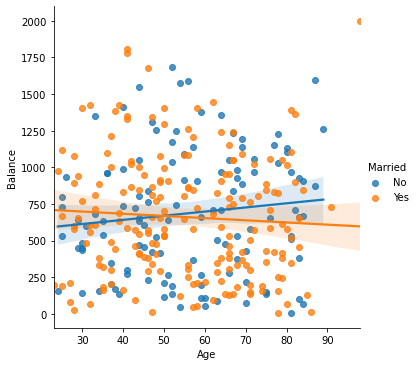

In [40]:
sns.lmplot(x="Age", 
           y="Balance", 
           hue="Married", 
           data=active_balance);

We see that individuals who are married have lower credit balance with age while non married people have higher credit balance.

Let us also check gender and no. of credit cards and the relationship between them.

In [41]:
model_gender_cards = smf.ols('Balance ~ Income + I(Income**2) + Rating + Age + Student + Gender*Cards', data=df).fit()
model_gender_cards.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     961.4
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          7.75e-252
Time:                        00:14:22   Log-Likelihood:                -2413.6
No. Observations:                 400   AIC:                             4845.
Df Residuals:                     391   BIC:                             4881.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -505.5063     29.280    -17.264      0.000    -563.073    -447.939
Student[T.Yes]           414.7916     17.165     24.165      0.000     381.045     448.538
Gender[T.Female]         -56.9505     24.573     -2.318      0.021    -105.262      -8.639
Income                    -8.6253      0.514    -16.766      0.000      -9.637      -7.614
I(Income ** 2)             0.0058      0.003      1.932      0.054      -0.000       0.012
Rating                     3.9674      0.055     72.561      0.000       3.860       4.075
Age                       -0.6826      0.303     -2.250      0.025      -1.279      -0.086
Cards                     -3.2603      5.083     -0.641      0.522     -13.254       6.734
Gender[T.Female]:Cards    15.7543      7.584      2.077      0.038       0.843      30.666
==============================================================================
Omnibus:                       13.489   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.150
Skew:                           0.444   Prob(JB):                     0.000846
Kurtosis:                       2.755   Cond. No.                     4.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

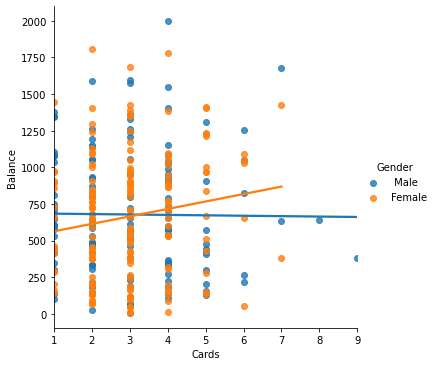

In [42]:
sns.lmplot(x="Cards", 
           y="Balance", 
           hue="Gender", 
           ci=None,
           data=active_balance);

The interaction between Gender and Cards is significant with a high coefficient, which demonstrates that Females who own more Cards have on average higher Balance. In this dataset we make the assumption that the Balance is recorded per person and not per credit card, implying that the balance recorded is calculated as an average across all the cards belonging to the same individual. We also see that Gender in isolation has a negative impact on Balance, suggesting that females, in general, have less credit card debt, except when that individual also owns multiple Cards.



## Finding the best model

We know that higher the R-squared value is, better our model fits. We see that the R-squared value is the highest in the model which included a polynomial relationship between Income and Balance and an interaction term between Income and Rating. Let's focus on the active dataset for now.

In [43]:
mod_income_rating_active = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Income*Rating', data = active_balance).fit()
mod_income_rating_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3170.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          4.43e-270
Time:                        00:14:22   Log-Likelihood:                -1663.2
No. Observations:                 310   AIC:                             3340.
Df Residuals:                     303   BIC:                             3367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -780.4994     20.847    -37.439      0.000    -821.523    -739.475
Student[T.Yes]   482.1976      9.149     52.705      0.000     464.194     500.201
Income            -9.4049      0.290    -32.466      0.000      -9.975      -8.835
I(Income ** 2)    -0.0045      0.003     -1.333      0.184      -0.011       0.002
Age               -1.1266      0.177     -6.374      0.000      -1.474      -0.779
Rating             4.7559      0.066     72.197      0.000       4.626       4.886
Income:Rating      0.0006      0.001      0.658      0.511      -0.001       0.002
==============================================================================
Omnibus:                        2.411   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                2.335
Skew:                          -0.152   Prob(JB):                        0.311
Kurtosis:                       2.703   Cond. No.                     2.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
mod_limit_cards_active = smf.ols('Balance ~ Income +  I(Income**2)+  Age + Student + Income*Rating + Limit + Cards', data = active_balance).fit()
mod_limit_cards_active.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.055e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:14:22   Log-Likelihood:                -1162.8
No. Observations:                 310   AIC:                             2344.
Df Residuals:                     301   BIC:                             2377.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -703.2401      4.420   -159.097      0.000    -711.938    -694.542
Student[T.Yes]   501.1326      1.840    272.316      0.000     497.511     504.754
Income            -9.9745      0.059   -170.261      0.000     -10.090      -9.859
I(Income ** 2)     0.0011      0.001      1.657      0.099      -0.000       0.002
Age               -1.0007      0.035    -28.305      0.000      -1.070      -0.931
Rating            -0.1370      0.059     -2.325      0.021      -0.253      -0.021
Income:Rating     -0.0003      0.000     -1.889      0.060      -0.001    1.44e-05
Limit              0.3370      0.004     85.120      0.000       0.329       0.345
Cards             25.5326      0.496     51.444      0.000      24.556      26.509
==============================================================================
Omnibus:                        4.113   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.093
Skew:                          -0.281   Prob(JB):                        0.129
Kurtosis:                       2.958   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the best model fit on the active dataset so far with a R-squared value of 99%. Adding the Limit term seems to have had a strong impact. This is a relationship which can be further analyzed.

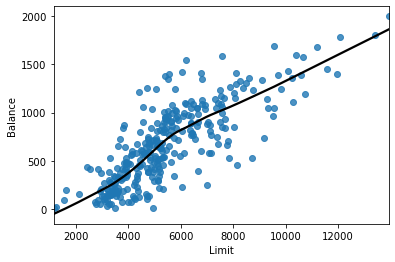

In [45]:
sns.regplot(x='Limit',
          y='Balance',
          data=active_balance,
          line_kws={'color':'black'},
          lowess=True)

Credit Limit appears to be a strong predictor for credit card Balance. This is an expected finding since we assume that a card owner is not allowed to have a Balance that exceeds their Limit. Consequently, this relationship simply articulates that, the higher the credit Limit, the greater the credit card expenses are for a given individual, and hence the insightfulness of this relationship is debatable.

In [46]:
model_rating =smf.ols('Balance ~ Rating', data = df).fit()
model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          1.90e-120
Time:                        00:14:23   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similarly, credit Rating is a highly accurate predictor of Balance. This could suggest that individuals with high Rating are more willing to incur credit debt as they are confident that they will be able to pay off the balance. Nevertheless, Rating is a complex variable, related to other predictors such as Income.

In [47]:
model_income =smf.ols('Balance ~ Income', data = df).fit()
model_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.03e-22
Time:                        00:14:23   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see only income is not an appropriate indicator of rating.

For the entire dataset, the best model predicted 96% of the variance. The model fit only on active users predicted 99% of variance. The difference suggests that there are other factors influencing non-active cardholders which are not present in our data, or their spending behaviour is reflected on other lending platforms.

## Logistic Regression

We apply logistic regression to check what all parameters affect whether a credit card is active or not.

In [48]:
log_mod = smf.glm('Active ~ Limit + Rating + Income + Age + Cards + Education', data = df,family=sm.families.Binomial()).fit()
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Generalized Linear Model Regression Results                       
=========================================================================================
Dep. Variable:     ['Active[No]', 'Active[Yes]']   No. Observations:                  400
Model:                                       GLM   Df Residuals:                      393
Model Family:                           Binomial   Df Model:                            6
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -53.379
Date:                           Sun, 04 Sep 2022   Deviance:                       106.76
Time:                                   00:14:23   Pearson chi2:                     464.
No. Iterations:                                9   Pseudo R-squ. (CS):             0.5504
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3924      2.040      4.114      0.000       4.394      12.390
Limit         -0.0024      0.002     -1.368      0.171      -0.006       0.001
Rating        -0.0210      0.026     -0.792      0.429      -0.073       0.031
Income         0.1114      0.021      5.291      0.000       0.070       0.153
Age           -0.0021      0.015     -0.143      0.886      -0.031       0.027
Cards         -0.1709      0.256     -0.668      0.504      -0.673       0.331
Education      0.0444      0.088      0.503      0.615      -0.128       0.217
==============================================================================
"""

We see that only Income is still kind of a significant predictor of whether a credit card is active or not. This makes sense because normally low-earners would prefer having zero balance credit cards to boost their creditworthiness.

## Making Predictions

astly, the model can be utilized in order to predict the credit card Balance of future customers given their demographic information. For this purpose, a dataset has been generated.

In [49]:
df_new=pd.DataFrame({'Income':np.random.normal(45, 20, 40),
                    'Rating':np.random.normal(355, 55, 40),
                    'Limit':np.random.normal(4735, 200, 40),
                    'Age':np.random.normal(56, 17, 40),
                    'Cards':list(range(0,10))*4,
                    'Student':['Yes']*20+['No']*20}) # randomn data generated
df_new.Cards[df_new.Cards == 0] = 3
df_new.Income[df_new.Income <= 0] = df_new.Income.mean()
df_new.Rating[df_new.Rating <= 0] = df_new.Rating.mean()
df_new.Limit[df_new.Limit <= 0] = df_new.Limit.mean()
df_new['Balance']= mod_limit_cards_active.predict(df_new)
df_new.describe()

<ipython-input-49-86c3548cf1df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Cards[df_new.Cards == 0] = 3
<ipython-input-49-86c3548cf1df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Income[df_new.Income <= 0] = df_new.Income.mean()
<ipython-input-49-86c3548cf1df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.Rating[df_new.Rating <= 0] = df_new.Rating.mean()
<ipython-input-49-86c3548cf1df>:10: SettingWit

,Income,Rating,Limit,Age,Cards,Balance
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,47.101899,350.053251,4743.315516,55.887076,4.800000,691.586109
std,19.032855,45.586849,228.008891,16.953257,2.554032,366.507082
min,5.346743,243.452026,3994.187593,16.817542,1.000000,46.304946
25%,34.053999,314.111980,4626.975330,44.325336,3.000000,422.917134
50%,43.900921,354.016023,4734.275773,52.695425,4.500000,616.605737
75%,59.853319,385.804226,4860.257692,65.874806,7.000000,1016.532390
max,85.681620,432.151205,5170.035581,94.485746,9.000000,1454.413075


Checking the R-squared value for the entire dataset for the model with highest variance. (99%)

Polynomial Relationship between limit and rating.

In [50]:
mod_limit_cards = smf.ols('Balance ~ Income + I(Income**2) + Age + Student + Income*Rating + Limit + Cards', data = df).fit()
mod_limit_cards.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1221.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):          3.04e-271
Time:                        00:14:23   Log-Likelihood:                -2367.9
No. Observations:                 400   AIC:                             4754.
Df Residuals:                     391   BIC:                             4790.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -368.0046     28.204    -13.048      0.000    -423.455    -312.554
Student[T.Yes]   433.8736     15.294     28.368      0.000     403.804     463.943
Income            -9.3145      0.464    -20.074      0.000     -10.227      -8.402
I(Income ** 2)    -0.0313      0.006     -5.633      0.000      -0.042      -0.020
Age               -0.6784      0.270     -2.514      0.012      -1.209      -0.148
Rating             0.5141      0.454      1.133      0.258      -0.378       1.406
Income:Rating      0.0109      0.001      7.903      0.000       0.008       0.014
Limit              0.1998      0.030      6.650      0.000       0.141       0.259
Cards             18.5345      3.991      4.644      0.000      10.688      26.381
==============================================================================
Omnibus:                       11.908   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.521
Skew:                           0.432   Prob(JB):                      0.00191
Kurtosis:                       2.932   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
active_balance.to_csv('active.csv',index=False)